In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [6]:
df = pd.read_csv(r'reversed-run-with-istio/output.csv')
# df = pd.read_csv(r'test-run/output.csv')

df['Script'] = df['Script'].apply(lambda x: x.strip('.lua').split('scripts/social-network/')[1])

def fun(x):
    if x[1]=='us':
        return float(x[0])/1000
    elif x[1]=='ms':
        return float(x[0])
    else:
        return float(x[0])*1000

#strip ms and convert ums to ms
df['P99'] = df['P99'].apply(lambda x: re.findall(r'(\d+\.\d+)([a-z]+)', x)[0])
df['P99'] = df['P99'].apply(lambda x: fun(x)).dropna()

df['P90'] = df['P90'].apply(lambda x: re.findall(r'(\d+\.\d+)([a-z]+)', x)[0])
df['P90'] = df['P90'].apply(lambda x: fun(x)).dropna()

df['P50'] = df['P50'].apply(lambda x: re.findall(r'(\d+\.\d+)([a-z]+)', x)[0])
df['P50'] = df['P50'].apply(lambda x: fun(x)).dropna()

df1 = df[df['Script'] == "read-home-timeline"]
df2 = df[df['Script'] == "compose-post"]


Read Home timeline

Text(0, 0.5, 'Average latency(ms)')

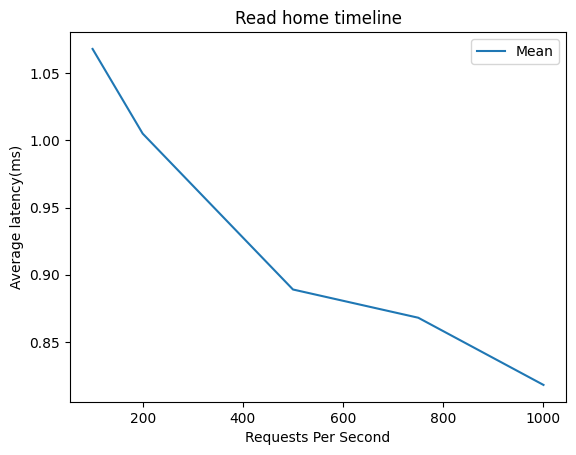

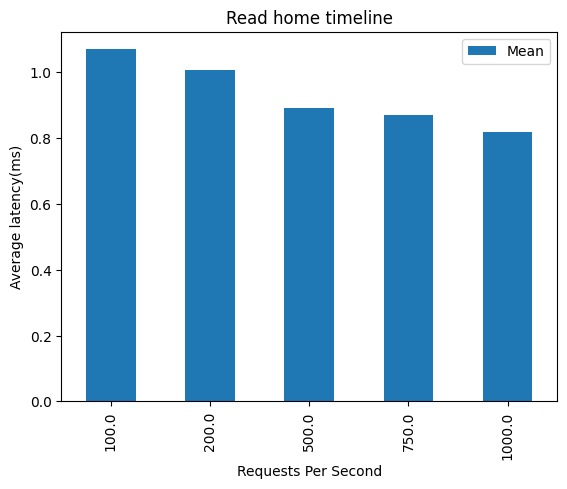

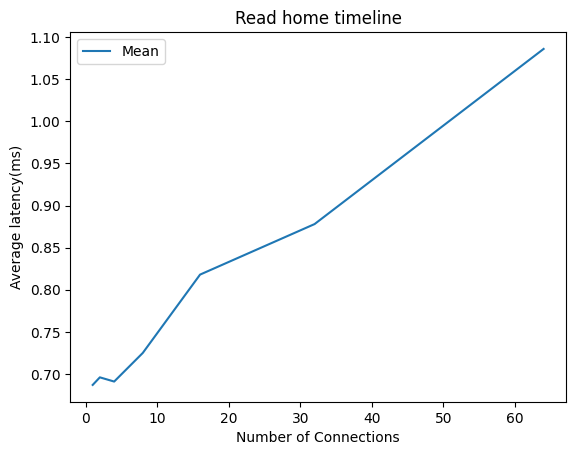

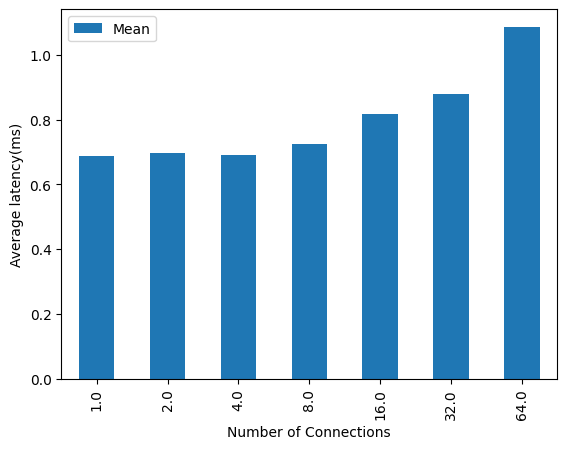

In [7]:
#average latency vs rps
filter = df1['Connections(s)'] == 16
dff = df1.where(filter).dropna()

dff = dff.groupby(['Requests Per Second'])[['Mean','Requests Per Second']].agg(min)
dff.plot('Requests Per Second','Mean',title = "Read home timeline")
plt.xlabel('Requests Per Second')
plt.ylabel('Average latency(ms)')

#bar graph
dff.plot.bar(x='Requests Per Second', y='Mean',title = "Read home timeline")
plt.xlabel('Requests Per Second')
plt.ylabel('Average latency(ms)')

#avg latency vs number of connections
filter = df1['Requests Per Second'] == 1000
dff = df1.where(filter).dropna()

dff = dff.groupby(['Connections(s)'])[['Mean','Connections(s)']].agg(min)
dff.plot('Connections(s)','Mean',title = "Read home timeline")
plt.xlabel('Number of Connections')
plt.ylabel('Average latency(ms)')

#bar graph
dff.plot.bar(x='Connections(s)', y='Mean')
plt.xlabel('Number of Connections')
plt.ylabel('Average latency(ms)')


Read home timeline (P50,P90,P99)

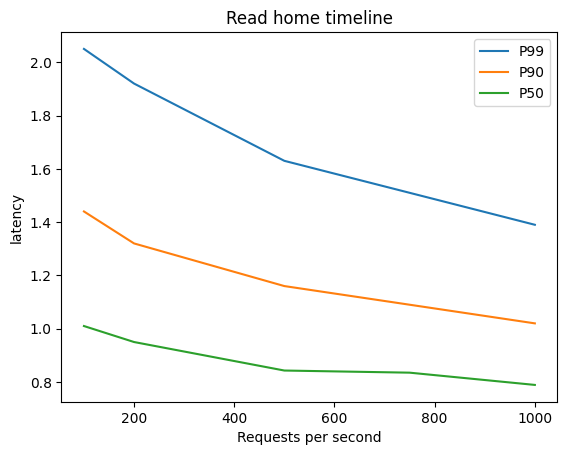

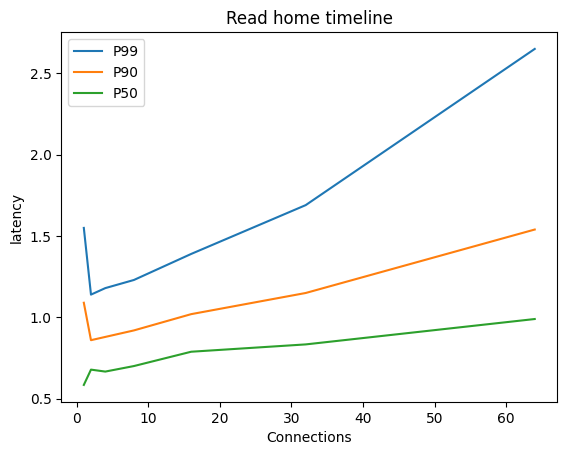

In [8]:
#average latency vs rps
filter1 = df1['Connections(s)'] == 16 
#filter2 = df2['Requests Per Second'] != 3000
dff = df1.where(filter1).dropna()
#dff = df2.where(filter2).dropna()

#line graph
dff = dff.groupby('Requests Per Second')[['P99','P90','P50','Requests Per Second']].agg(min)
plt.plot(dff['Requests Per Second'],dff['P99'],label='P99')
plt.plot(dff['Requests Per Second'],dff['P90'],label='P90')
plt.plot(dff['Requests Per Second'],dff['P50'],label='P50')
plt.xlabel("Requests per second")
plt.ylabel("latency")
plt.title("Read home timeline")
plt.legend()
plt.show()

#avg latency vs number of connections
filter = df1['Requests Per Second'] == 1000
dff = df1.where(filter).dropna()

dff = dff.groupby('Connections(s)')[['P99','P90','P50','Connections(s)']].agg(min)
plt.plot(dff['Connections(s)'],dff['P99'],label='P99')
plt.plot(dff['Connections(s)'],dff['P90'],label='P90')
plt.plot(dff['Connections(s)'],dff['P50'],label='P50')
plt.xlabel("Connections")
plt.ylabel("latency")
plt.title("Read home timeline")
plt.legend()
plt.show()


Text(0, 0.5, 'Average latency(ms)')

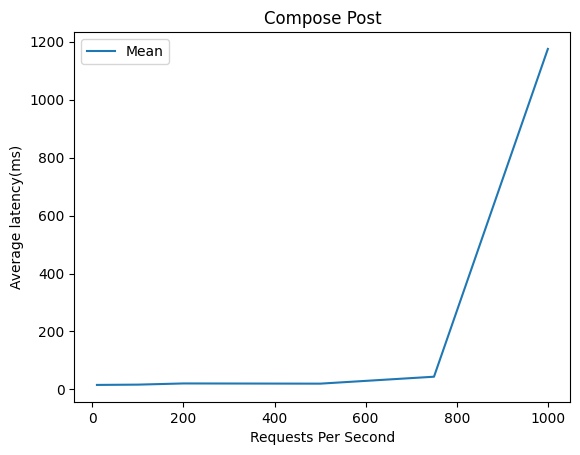

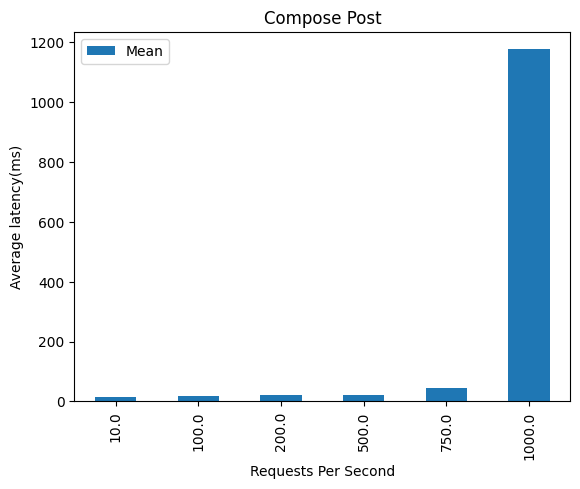

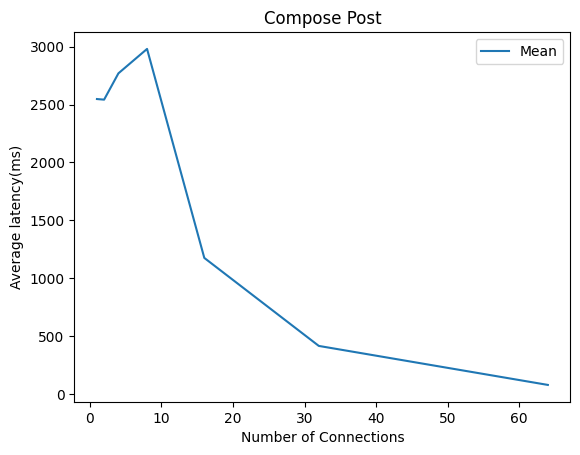

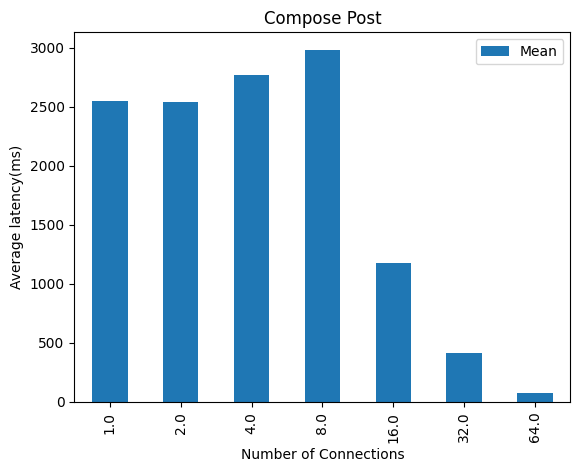

In [9]:
#average latency vs rps
filter = df2['Connections(s)'] == 16
dff = df2.where(filter).dropna()

dff = dff.groupby(['Requests Per Second'])[['Mean','Requests Per Second']].agg(min)
dff.plot('Requests Per Second','Mean',title = "Compose Post")
plt.xlabel('Requests Per Second')
plt.ylabel('Average latency(ms)')

#bar graph
dff.plot.bar(x='Requests Per Second', y='Mean',title = "Compose Post")
plt.xlabel('Requests Per Second')
plt.ylabel('Average latency(ms)')

#avg latency vs number of connections
filter = df2['Requests Per Second'] == 1000
dff = df2.where(filter).dropna()

dff = dff.groupby(['Connections(s)'])[['Mean','Connections(s)']].agg(min)
dff.plot('Connections(s)','Mean',title = "Compose Post")
plt.xlabel('Number of Connections')
plt.ylabel('Average latency(ms)')

#bar graph
dff.plot.bar(x='Connections(s)', y='Mean',title = "Compose Post")
plt.xlabel('Number of Connections')
plt.ylabel('Average latency(ms)')


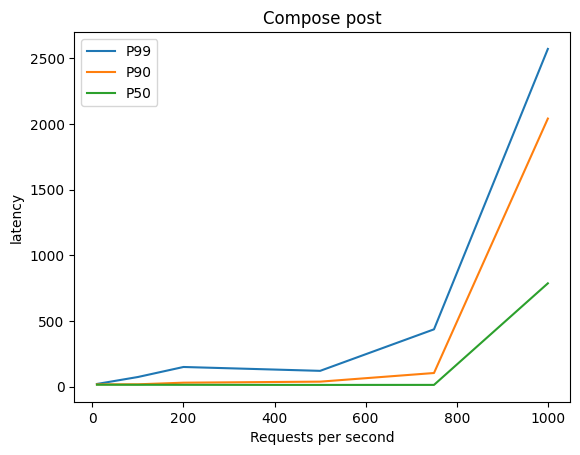

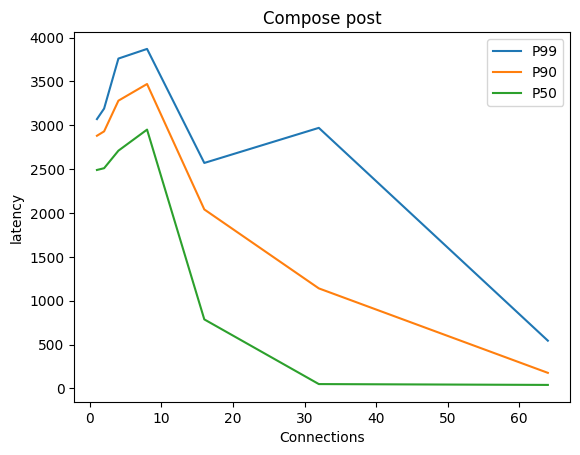

In [10]:
#average latency vs rps
filter1 = df2['Connections(s)'] == 16 
#filter2 = df2['Requests Per Second'] != 3000
dff = df2.where(filter1).dropna()
#dff = df2.where(filter2).dropna()

#line graph
dff = dff.groupby('Requests Per Second')[['P99','P90','P50','Requests Per Second']].agg(min)
plt.plot(dff['Requests Per Second'],dff['P99'],label='P99')
plt.plot(dff['Requests Per Second'],dff['P90'],label='P90')
plt.plot(dff['Requests Per Second'],dff['P50'],label='P50')
plt.xlabel("Requests per second")
plt.ylabel("latency")
plt.title("Compose post")
plt.legend()
plt.show()

#avg latency vs number of connections
filter = df2['Requests Per Second'] == 1000
dff = df2.where(filter).dropna()

dff = dff.groupby('Connections(s)')[['P99','P90','P50','Connections(s)']].agg(min)
plt.plot(dff['Connections(s)'],dff['P99'],label='P99')
plt.plot(dff['Connections(s)'],dff['P90'],label='P90')
plt.plot(dff['Connections(s)'],dff['P50'],label='P50')
plt.xlabel("Connections")
plt.ylabel("latency")
plt.title("Compose post")
plt.legend()
plt.show()